In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load session
mouse = '4139224.3'
df = pp.load_session_db()


#df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
823,4139224.3,18_10_2018,1,TwoTower_noTimeout,61,1,CA1,2018-10-18,G:\My Drive\\VR_Data\TwoTower\4139224.3\18_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
825,4139224.3,18_10_2018,3,TwoTower_noTimeout,41,1,CA1,2018-10-18,G:\My Drive\\VR_Data\TwoTower\4139224.3\18_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
859,4139224.3,20_10_2018,2,TwoTower_noTimeout,60,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139224.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...
897,4139224.3,23_10_2018,1,TwoTower_Timeout,48,1,CA1,2018-10-23,G:\My Drive\\VR_Data\TwoTower\4139224.3\23_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...
927,4139224.3,25_10_2018,1,TwoTower_Timeout,69,1,,2018-10-25,G:\My Drive\\VR_Data\TwoTower\4139224.3\25_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...
951,4139224.3,26_10_2018,3,TwoTower_Timeout,72,1,CA1,2018-10-26,G:\My Drive\\VR_Data\TwoTower\4139224.3\26_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...
967,4139224.3,27_10_2018,4,TwoTower_Timeout,67,1,CA1,2018-10-27,G:\My Drive\\VR_Data\TwoTower\4139224.3\27_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...
977,4139224.3,29_10_2018,1,TwoTower_Timeout,71,1,CA1,2018-10-29,G:\My Drive\\VR_Data\TwoTower\4139224.3\29_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...
988,4139224.3,30_10_2018,1,TwoTower_Timeout,78,1,CA1,2018-10-30,G:\My Drive\\VR_Data\TwoTower\4139224.3\30_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...
1001,4139224.3,31_10_2018,2,TwoTower_Timeout,66,1,CA1,2018-10-31,G:\My Drive\\VR_Data\TwoTower\4139224.3\31_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


((<matplotlib.figure.Figure at 0x2a66c12e6d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a66c12ee80>),
 (<matplotlib.figure.Figure at 0x2a663a47a90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a66a2baf60>),
 (<matplotlib.figure.Figure at 0x2a66c3e6f60>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a66c122748>))

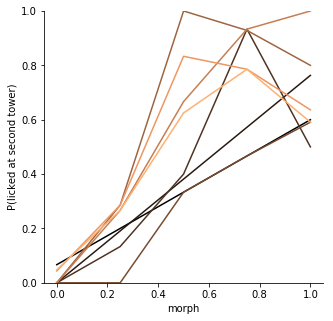

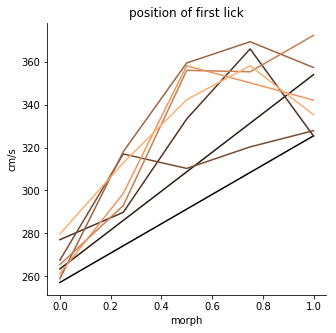

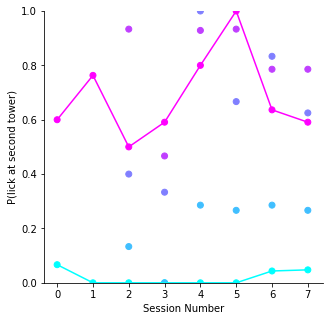

In [3]:
data = pp.behavior_dataframe([df_mouse['data file'].iloc[i] for i in range(3,df_mouse.shape[0],1)],concat=False)
b.learning_curve_plots(data)

In [4]:
VRDat,C,Cd, S, A = pp.load_scan_sess(df_mouse.iloc[8])
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)

G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_002.mat
#subsystem#not made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [5]:
# fit encoding model - position x context

# run 10-fold cross validation and pick cells that model predicts variance significantly compared to shuffled distribution

# single cell decoding - look at last time point



In [ ]:
# check morphed rate maps

# average rate map fit by linear combination of two extreme rate maps?
# redo with distributions rather than rate maps

# single trial fits

# check mixing coefficients against bootstrapped distributions of 